In [1]:
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn import FunctionSampler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Importing the dataset

df1=pd.read_csv("loan_outcomes_202309050207.csv")
df2=pd.read_csv("user_attributes_202309050209.csv")
df3=pd.read_csv("user_gps_fixes_202309050208.csv")

In [3]:
df1

,user_id,application_at,loan_outcome
0,1,2017-08-14 09:08:50.000,defaulted
1,2,2016-05-17 10:10:12.447,repaid
2,3,2016-10-20 10:07:20.459,defaulted
3,4,2017-01-13 13:03:34.000,defaulted
4,5,2016-11-03 15:41:39.124,repaid
...,...,...,...
395,396,2016-10-10 12:20:18.367,defaulted
396,397,2018-02-12 08:29:42.000,defaulted
397,398,2016-08-30 11:01:41.879,defaulted
398,399,2016-09-11 08:14:06.034,defaulted


In [4]:
df2

,user_id,age,cash_incoming_30days
0,1,42,8988.12
1,2,36,9968.12
2,3,27,59.04
3,4,38,2129.03
4,5,33,2102.53
...,...,...,...
395,396,29,1947.86
396,397,28,6099.13
397,398,24,7136.95
398,399,62,18043.21


Merging the "loan_outcomes" and "user_attributes" on "user_id" as they have same number of rows and a unique feature "user_id" having a one-to-one relation

In [5]:
# Merging the "loan_outcomes" and "user_attributes" on "user_id" 
df = pd.merge(df2,df1,on="user_id")

In [6]:
df3

,id,gps_fix_at,server_upload_at,longitude,latitude,accuracy,altitude,bearing,location_provider,user_id
0,1,2017-06-22 09:37:20.000,2017-06-22 09:43:42.000,36.840540,-1.294342,68.4,0.0,0.0,fused,1
1,2,2017-08-14 07:50:27.000,2017-08-14 09:05:27.000,36.895270,-1.341928,1409.0,0.0,0.0,fused,1
2,3,2017-06-13 10:34:29.000,2017-06-13 10:54:48.000,36.811903,-1.307220,68.4,0.0,0.0,fused,1
3,4,2017-06-18 12:16:20.000,2017-06-18 12:16:24.000,36.907049,-1.309984,1581.0,0.0,0.0,fused,1
4,5,2017-06-28 09:39:08.000,2017-06-28 09:58:12.000,36.839396,-1.280310,1396.0,0.0,0.0,fused,1
...,...,...,...,...,...,...,...,...,...,...
26705,26706,2016-04-18 16:29:59.000,2016-04-18 16:30:04.000,37.353319,-1.298492,4744.0,-1.0,-1.0,network,400
26706,26707,2016-06-03 12:50:27.000,2016-06-03 12:50:36.000,37.368250,-1.298735,4656.0,-1.0,-1.0,network,400
26707,26708,2016-06-03 15:14:14.000,2016-06-03 15:14:21.000,37.359132,-1.314915,4656.0,-1.0,-1.0,network,400
26708,26709,2016-05-14 16:55:33.000,2016-05-14 16:55:48.000,37.350335,-1.260356,3419.0,-1.0,-1.0,network,400


In [7]:
df3[df3['user_id']==1]

,id,gps_fix_at,server_upload_at,longitude,latitude,accuracy,altitude,bearing,location_provider,user_id
0,1,2017-06-22 09:37:20.000,2017-06-22 09:43:42.000,36.840540,-1.294342,68.4,0.0,0.0,fused,1
1,2,2017-08-14 07:50:27.000,2017-08-14 09:05:27.000,36.895270,-1.341928,1409.0,0.0,0.0,fused,1
2,3,2017-06-13 10:34:29.000,2017-06-13 10:54:48.000,36.811903,-1.307220,68.4,0.0,0.0,fused,1
3,4,2017-06-18 12:16:20.000,2017-06-18 12:16:24.000,36.907049,-1.309984,1581.0,0.0,0.0,fused,1
4,5,2017-06-28 09:39:08.000,2017-06-28 09:58:12.000,36.839396,-1.280310,1396.0,0.0,0.0,fused,1
...,...,...,...,...,...,...,...,...,...,...
65,66,2017-06-25 18:24:01.000,2017-06-25 19:14:58.000,37.525418,-2.796975,4152.0,0.0,0.0,fused,1
66,67,2017-04-05 08:38:57.000,2017-04-05 08:39:00.000,36.991799,-1.261228,5.4,1509.7,276.0,fused,1
67,68,2017-06-28 06:00:35.000,2017-06-28 07:08:54.000,36.874843,-1.341133,2007.0,0.0,0.0,fused,1
68,69,2017-01-24 15:27:24.000,2017-01-24 15:28:32.000,36.903354,-1.331759,39.0,0.0,0.0,fused,1


"user_gps_fixes" has 26710 rows with multiple rows having the same "user_id"

The data represents the location where the user open the bank app.

Lets find out the number of times each user open the bank app and concat that data with the dataset obtained by joining the other two datasets

In [8]:
# Creating a dataset that contains "user_id" and "count"
count = df3['user_id'].value_counts().reset_index()
count.columns = ['user_id', 'count']
count

,user_id,count
0,278,1615
1,30,619
2,100,494
3,162,416
4,223,398
...,...,...
367,4,2
368,3,1
369,314,1
370,367,1


In [9]:
# merging the "count" dataset with "df"
df = pd.merge(count,df,on="user_id", how='outer')

In [10]:
df

,user_id,count,age,cash_incoming_30days,application_at,loan_outcome
0,278,1615.0,32,9547.71,2016-11-16 12:34:03.000,repaid
1,30,619.0,19,27563.58,2016-09-03 20:29:01.104,repaid
2,100,494.0,46,865.24,2016-11-27 14:31:23.324,repaid
3,162,416.0,41,15803.79,2016-11-19 10:20:01.642,repaid
4,223,398.0,44,18977.87,2015-09-04 12:40:45.000,repaid
...,...,...,...,...,...,...
395,260,NaN,29,344.08,2018-02-07 04:26:16.000,defaulted
396,303,NaN,23,18721.53,2017-11-16 04:32:27.000,repaid
397,312,NaN,37,1319.09,2018-03-05 06:18:10.000,defaulted
398,327,NaN,28,571.46,2017-08-02 14:44:34.000,repaid


In [11]:
# dropping the column "application_at" as the time and date of application it will not contribute 
# in deciding if the user will repay the loan or not 
df.drop(['application_at'],axis=1 ,inplace=True)

In [12]:
# checking for missing values
df.isnull().sum()

user_id                  0
count                   28
age                      0
cash_incoming_30days     0
loan_outcome             0
dtype: int64

In [13]:
# Finding summary statistics for numerical columns in our DataFrame
df.describe()

,user_id,count,age,cash_incoming_30days
count,400.000000,372.000000,400.000000,400.000000
mean,200.500000,71.801075,36.487500,7896.301075
std,115.614301,111.022414,13.243236,7037.481340
min,1.000000,1.000000,18.000000,11.900000
25%,100.750000,16.000000,27.000000,2602.472500
50%,200.500000,42.000000,34.000000,6004.240000
75%,300.250000,94.250000,44.000000,10989.405000
max,400.000000,1615.000000,105.000000,41657.810000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               400 non-null    int64  
 1   count                 372 non-null    float64
 2   age                   400 non-null    int64  
 3   cash_incoming_30days  400 non-null    float64
 4   loan_outcome          400 non-null    object 
dtypes: float64(2), int64(2), object(1)
memory usage: 18.8+ KB


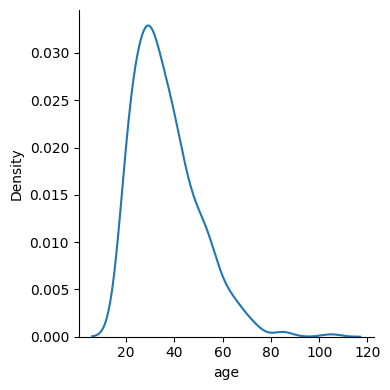

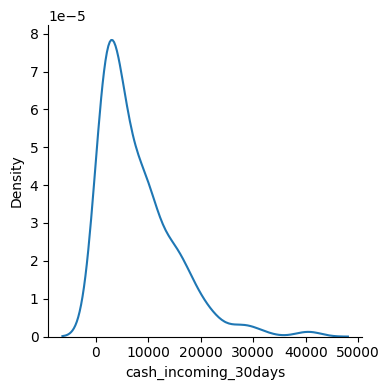

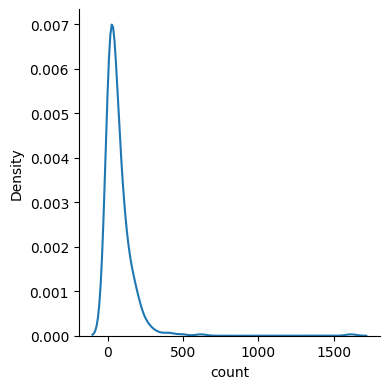

In [15]:
# finding the distribution of all the numerical columns

sns.displot(df['age'], kind="kde", height=4)
sns.displot(df['cash_incoming_30days'], kind="kde", height=4)
sns.displot(df['count'], kind="kde", height=4)

All the numeric features are right skewed

<IPython.core.display.Javascript object>

<AxesSubplot: ylabel='count'>

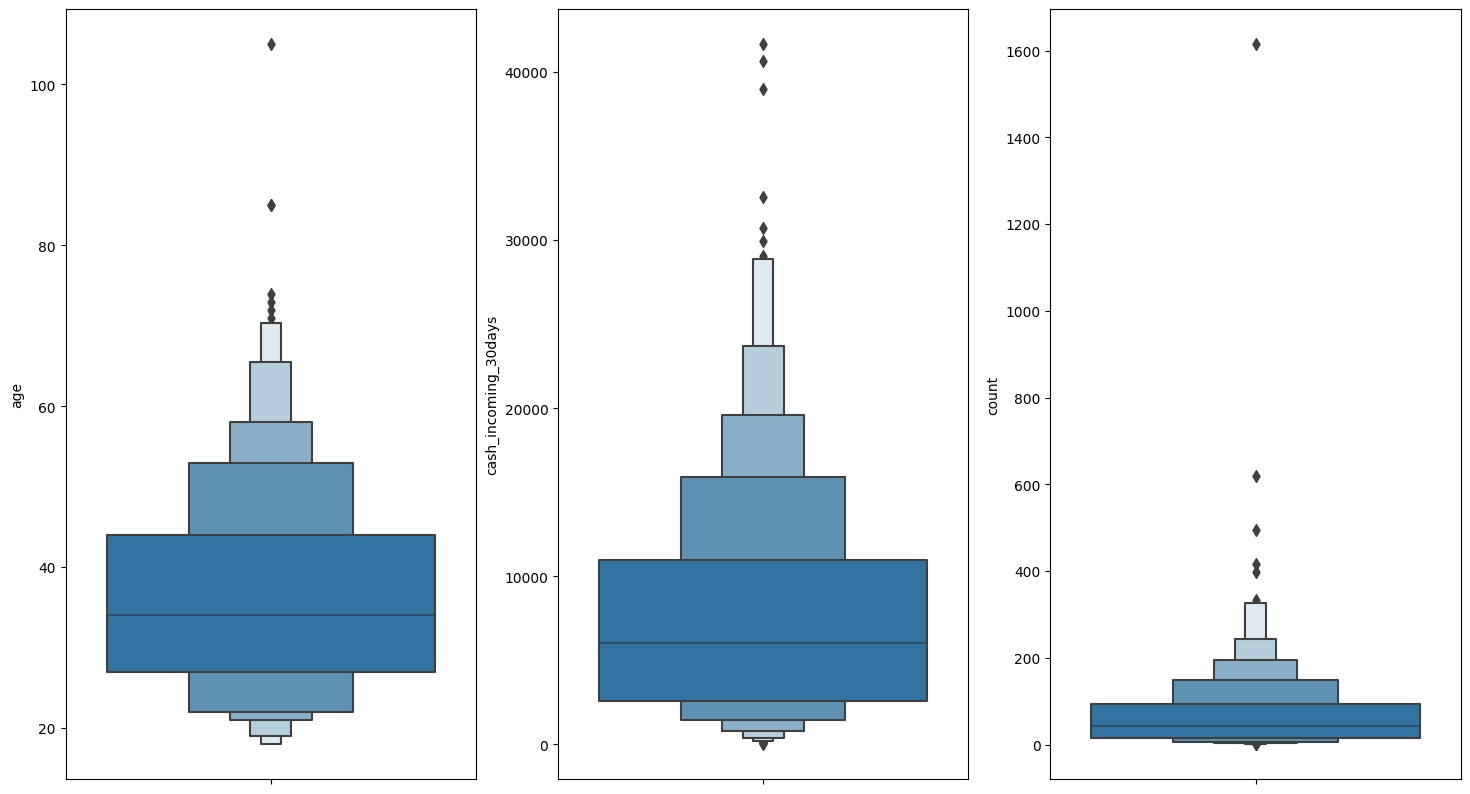

In [16]:
# checking for outliers and distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
sns.boxenplot(ax=axes[0],data=df, y='age')
sns.boxenplot(ax=axes[1],data=df, y='cash_incoming_30days')
sns.boxenplot(ax=axes[2],data=df, y='count')

In [17]:
#finding the corelation of all the features
df.corr()

/var/folders/w_/t1wy85056ynbx0y3zmhmlnq00000gn/T/ipykernel_35301/1115727648.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,user_id,count,age,cash_incoming_30days
user_id,1.000000,-0.054662,-0.067790,-0.038825
count,-0.054662,1.000000,0.013292,0.064138
age,-0.067790,0.013292,1.000000,0.006339
cash_incoming_30days,-0.038825,0.064138,0.006339,1.000000


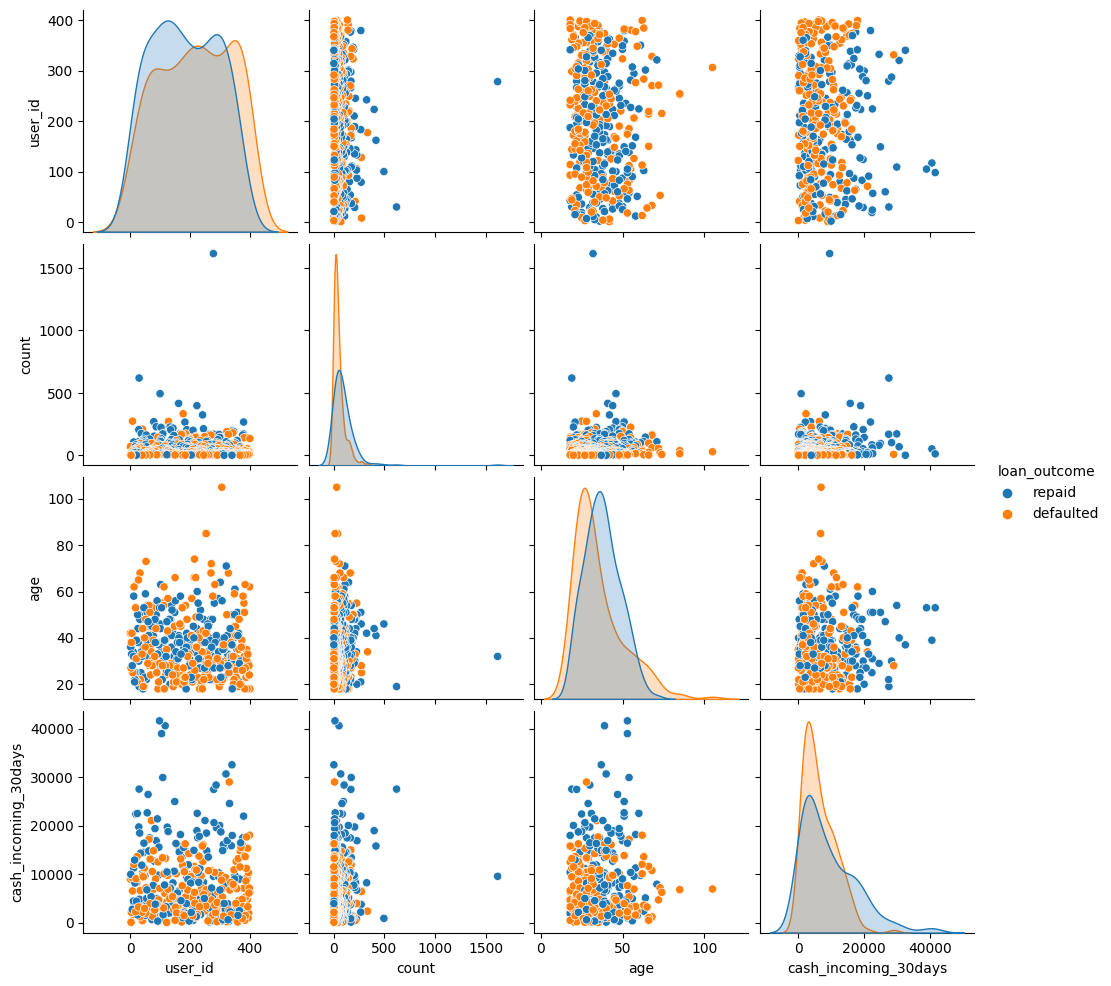

In [18]:
# finding the geometric relationship between all the attributes in the dataset with one another
sns.pairplot(df, hue='loan_outcome')

In [ ]:
# checking if the dataset is imbalanced
sns.countplot(data=df, x='loan_outcome')

In [19]:
# converting the target attribute using one-hot-encoding 
df=pd.get_dummies(data=df,columns=["loan_outcome"],drop_first=True)

In [20]:
df

,user_id,count,age,cash_incoming_30days,loan_outcome_repaid
0,278,1615.0,32,9547.71,1
1,30,619.0,19,27563.58,1
2,100,494.0,46,865.24,1
3,162,416.0,41,15803.79,1
4,223,398.0,44,18977.87,1
...,...,...,...,...,...
395,260,NaN,29,344.08,0
396,303,NaN,23,18721.53,1
397,312,NaN,37,1319.09,0
398,327,NaN,28,571.46,1


In [21]:
# splitting the dataset

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

In [22]:
# creating a function to remove outiers using IQR method

def CustomSampler_IQR (X, y):
    
    features = X.columns
    df = X.copy()
    df['Outcome'] = y
    
    indices = [x for x in df.index]    
    out_indexlist = []
        
    for col in features:
       
        #Using nanpercentile instead of percentile because of nan values
        Q1 = np.nanpercentile(df[col], 25.)
        Q3 = np.nanpercentile(df[col], 75.)
        
        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
                
        outliers_index = df[col][(df[col] < lower) | (df[col] > upper)].index.tolist()
        outliers = df[col][(df[col] < lower) | (df[col] > upper)].values        
        out_indexlist.extend(outliers_index)
        
    #using set to remove duplicates
    out_indexlist = list(set(out_indexlist))
    
    clean_data = np.setdiff1d(indices,out_indexlist)

    return X.loc[clean_data], y.loc[clean_data]

In [23]:
# removing the outliers from the dataset
X,y=CustomSampler_IQR (X,y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

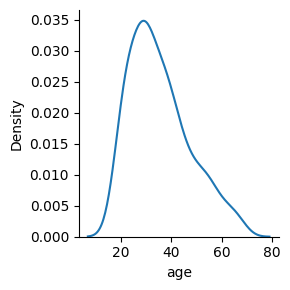

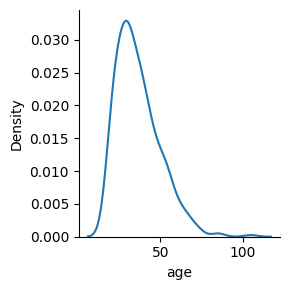

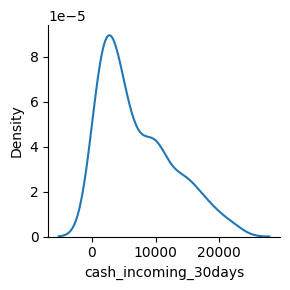

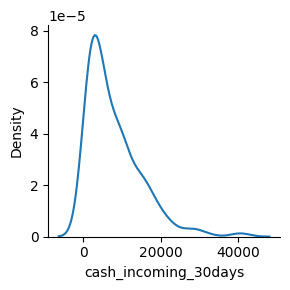

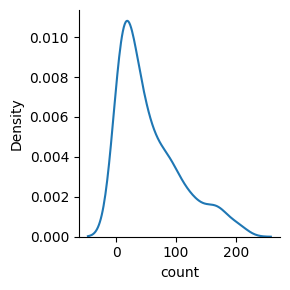

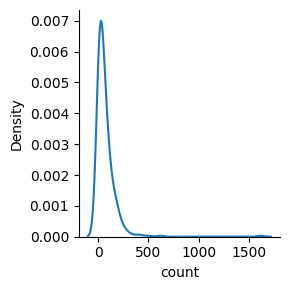

In [24]:
# comparing the distribution before and after removal of outliers
num_features = ['age','cash_incoming_30days','count']
for i in num_features:
    sns.displot(X[i], kind="kde",height=3)
    sns.displot(df[i], kind="kde",height=3)


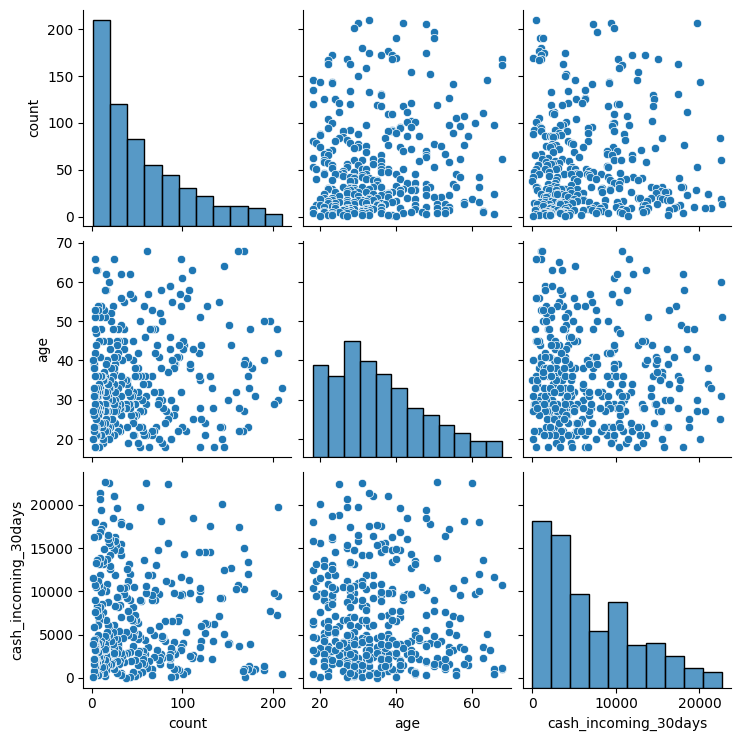

In [25]:
# finding the geometric relationship between all the attributes in the dataset with one another after outlier removal

sns.pairplot(X)

Creating a pipeline 

In [26]:
# 1. imputation
# imputing the missing data using KNN imputation

trf1 = ColumnTransformer ([('impute_count' ,KNNImputer(), [0])]
                          ,remainder='passthrough')

In [27]:
# Scaling
# Sclaing the features sing min-max scaler

trf2 = ColumnTransformer([
('scale' ,MinMaxScaler(),slice(0,5))
])

<IPython.core.display.Javascript object>

In [28]:
# power transform
# applying tranformation on data to make the data distribution more Gaussian like

trf3 = ColumnTransformer([
('power' ,PowerTransformer(),slice(0,5))
])

In [29]:
# train the model
# Training the model on Logistic Regression

trf4 = LogisticRegression()

In [30]:
# train the model
# Training the model on Random Forest Classifier

trf5=RandomForestClassifier(max_depth=2, random_state=0)

In [31]:
# Pipeline for Logistic Regression

lr_pipe = Pipeline([("trf1",trf1),
                 ("trf2",trf2),
                 ("trf3",trf3),
                 ("trf4",trf4)
                 ])

In [32]:
# # Pipeline for Random Forest Classifier

rf_pipe=Pipeline([("trf1",trf1),
                 ("trf2",trf2),
                 ("trf3",trf3),
                 ("trf5",trf5)
                 ])

In [33]:
# Applying k-fold cross validation and finding the mean accuracy on Logistic Regression

kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats = 3, random_state = 42)
cv_score = cross_val_score(lr_pipe, X, y, cv=kfold, scoring='accuracy')
print("Logistic Regression - Acc(SD): {0:0.4f} ({1:0.4f})". format(cv_score.mean(), cv_score.std()))

<IPython.core.display.Javascript object>

Logistic Regression - Acc(SD): 0.6198 (0.0579)


In [34]:
# Applying k-fold cross validation and finding the mean accuracy on Random Forest Classifier

kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats = 3, random_state = 42)
cv_score = cross_val_score(rf_pipe, X, y, cv=kfold, scoring='accuracy')
print("Random forest - Acc(SD): {0:0.4f} ({1:0.4f})". format(cv_score.mean(), cv_score.std()))

<IPython.core.display.Javascript object>

Random forest - Acc(SD): 0.6593 (0.0617)
